# Final Project Submission


* Student name: Sarabi Eventide 
* Student pace: self-paced
* Scheduled project review date/time: January 23rd, 2019/ 7 PM EST
* Instructor name:  Eli Thomas
* Blog post URL: 

## Obtaining the Data

Before making any decisions about the data, we must define the scope of this data analysis. In order to do so, I shall consider the following questions:
1. Who are the stakeholders in this problem?
    - The stakeholders are Kings County real estate developers. Although they may not have in-depth knowledge of statistical analysis, they are familiar with market behvaior and trends.
2. What do they want to know?
    - They want to be able to predict a the price of a house. In order to do this, we need to know how location, size, age and other factors affect the price and create models for these variables. 
3. What data is available to me?
    - I have a set of data containing information about the size, rooms, location, age, renovation and quality of the houses.
4. What tools will aid in completing the project?
    - In addition to using standard packages such as pandas, numpy, seaborn, matplotlib, scipi and sklearn, we will most likely create our projects using simple linear regression or multiple linear regression. 

In [1]:
import pandas as pd # helps manipulate CSV files
import numpy as np  # helps with number crunching
import seaborn as sns # provides extra styling and functionality when visualizing
import matplotlib.pyplot as plt  # helps with visualizing
%matplotlib inline

import statsmodels.api as sm  # used to build statistical models
import statsmodels.formula.api as smf # get the formulas
from statsmodels.formula.api import ols # ordinary least squares library

import scipy.stats as stats  # statistical calculations
from scipy.stats import kurtosis, skew # used for exploring distributions

from sklearn.feature_selection import RFE  # recursive feature elimination: selects features
                                            # by considering smaller and smaller set 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import LabelEncoder  # encodes categorical variables and retains numerical analysis
from sklearn.model_selection import train_test_split # tests subsets of the data
from sklearn.metrics import mean_squared_error # avg of sqr of error. e.g how "correct" our model is
from sklearn.model_selection import cross_val_score # asses how model will generalize to an independent data set


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('kc_house_data.csv')  # import the file
df.head()  # taking a look at the first few rows
           # to see what type of information I'm working with 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<br>
Looking at the excerpt, I see what appears to be both qualitative and quantitative variables. There are a few null values quite a few zero, especially in the "sqft_basement" and "yr_renovated" columns. Before I begin re-arranging the table, however, I'd like to look at other descriptive measures to see which groups may be more relevant than others. The new information will also help me clean the data.

<br>

In [3]:
df.info() # a quick summary of what the rows and columns contain 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
waterfront_percent = round(((2376/21597)*100),2) 
reno_percent = round(((3842/21597)*100),2)
print(f"We are missing {waterfront_percent} percent of the waterfront data and {reno_percent} percent of the household renovation data")

We are missing 11.0 percent of the waterfront data and 17.79 percent of the household renovation data


In other words, we still have about 90% of the waterfront data and about 80% of the household renovation data. These are sufficient numbers to proceed, however, we must also check the data for placeholder values, because the of the high number of zeros.

I also see a few columns (waterfront, condition, grade, yr_built, yr_renovated, zipcode) appear to be miscategorized as floats and ints, although the df.head() command shows they are most likely. First, we need to look at the summary statistics to get a better feel for the data. The we need to find out whether there are any anomalies that cause the "sqft_basement" column to be labeled as objects and the "yr_renovated" column to be cast as a float, instead of what I suspect should be at least integers. Finally, we can look for placeholders in other columns.

In [5]:
df.describe() # gather summary statistics of the data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


As I suspected, the waterfront, condition, grade and zipcode values are all categorical. We know this because their distributions are limited and the values are finite. The values in these columns describe quality, rather than quantity. The waterfront column, specifically, is full of boolean values (facing or not facing the waterfront). It is unclear at this moment whether the views column is a boolean (categorical variable) or a view count (quantitative variable). I need to look further into the yr_renovated category, because most of the data is '0', but the max is '2015'. Because sqft_basement is an object, it is not included in the summary statistics. I will need to change the data type in order to explore it. I'll look into each of these specific features to make decisions. 

## Scrubbing the data

In [6]:
# Automate comparative scatterplot viewing
# this function allows me to plot 4 scatterplots next to each other
# for ease of comparison

def multi_scatter(column_names = None, target = None):
    fig, axs = plt.subplots(1, 4, sharey=True, figsize=(18, 6))
    for idx, feature in enumerate(column_names):
        df.plot(kind='scatter', x=feature, y=target, ax=axs[idx], label=feature, alpha = 0.3)
    plt.legend()
    
# Drop outliers in a column
def drop_max(column_name = None):
    max_val = df[column_name].idxmax()
    df[column_name] = df[column_name].drop([max_val])
    return df.boxplot([column_name])

# quickly build heatmaps
def correlation_heatmap(df): 
    _, ax = plt.subplots(figsize = (15, 10))
    colormap= sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(df.corr(), annot=True, cmap = colormap)

I wrote the "multi_scatter" function so I could make scatterplots in groups of four. Although I used the funciton a lot in the beginning stages of my analysis, I ultimately found no use for the scatterplots after I changed my approach. I left the function there in order to document that part of the process. Drop_outliers helps me determine which rows contain overly large values and then drop them. The box plot helps me visually check for outliers. The correlation_heatmap helps determine how strongly related two features are, but it does not mean there is causation.

### Where are the  null values in the data frame?

We know that only two columns contain NaN values, but are there any placeholders or zeros in the data frame?

In [7]:
df['condition'].value_counts()  # checking for placeholders
                                # chose value counts for the sake of granularity
                                # lower frequencies get lost in a hist with so many data points

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [8]:
df['grade'].value_counts() 

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [9]:
df['zipcode'].unique() # checking for placeholder
# the list is too long to see all the values with value counts. 

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

For "grade" and "condition", I used value_counts() because it would be easy to type, say, '1' when a value is missing. If I saw an overwhelming amount of 1s, that would be a sign of a placeholder. In the condition category, we see a lot of 3s, this value makes sense because it is the value commonly thought of as "average condition" in layman's terms. It would actually be more unusual to see a lot of houses that are perfect (5) or in total disrepair (1). For zipcodes, rather than checking whether a value overwhelms the rest, we can check unique values. Because the zipcodes have a set format and are all in the same area, a placeholder number would stick out. To double check, I'll take a look at a histogram.

(array([2856., 4380., 3341., 1696.,  351., 4257., 1809., 1134., 1040.,
         733.]),
 array([98001. , 98020.8, 98040.6, 98060.4, 98080.2, 98100. , 98119.8,
        98139.6, 98159.4, 98179.2, 98199. ]),
 <a list of 10 Patch objects>)

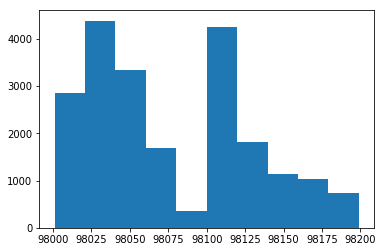

In [10]:
plt.hist(df['zipcode'])

As we can see, there are no zeros in the "zipcode" column and none of the values overwhelm the others. There appears to be a relatively small numner of houses in the zipcodes between 98075 and 98100. This may be because those zipcodes are on the outer edges of the county, and are therefore mostly excluded, or because there is a lake, commercial district, forest, or other land feature preventing houses from being built on that land. Without mapping the zipcodes onto a map, it is difficult to determine the cause of the dip.  

In [11]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

The view column is a quantitative variable, so it can remain an integer. It seems the majority of properties have not been viewed, which makes sense because only a small number of houses are for sale at a given time. I am choosing not to drop this category because view counts may give us an indication of which locations are in-demand. A high view count in a certain area means the demand is higher than the supply, which could drive prices up.

### Are the columns *really* categorical?

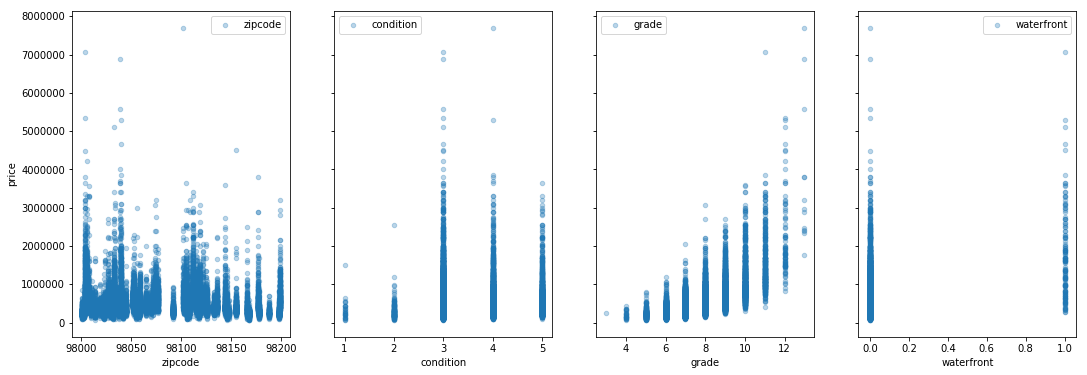

In [12]:
multi_scatter(column_names = ['zipcode', 'condition', 'grade', 'waterfront'], 
              target = 'price')

Here we see three distinct categorical variables: condition, grade, waterfront. The zipcode column appears to be more continuous. I will make note of them, but I do not plan to encode until after cleaning the rest of the data and looking at the heatmap. 

### Dealing with Outliers

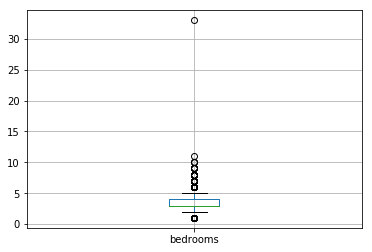

In [13]:
df.boxplot(['bedrooms'])

Only one house has 33 bedrooms, and this number is far higher than the next largest number of rooms. It seems unlikely that the number of bedrooms would jump from 11 to 33, so it is safe to assume this is a placeholder value. Getting rid of it will give cleaner summary statistics. 

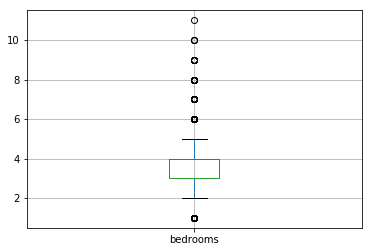

In [14]:
drop_max(column_name = 'bedrooms')

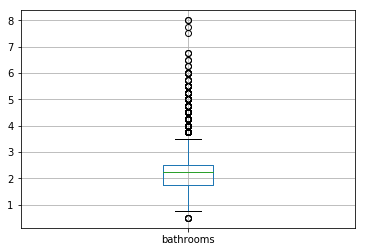

In [15]:
df.boxplot(['bathrooms']) # check for bathroom outliers

Though there are quite few houses with more than 4 bathrooms, none of the numbers appear obvious ouliers. Therefore, this data is acceptable. 

The summary statistics also showed a housing lot that is almost 900,000 square feet. This is almost certainly an outlier (the possible the result of a mis-zoned lot), but I'd like to verify instead. While value counts are useful when you are dealing with a small set of categories, I need to use a data visualization method to look at the square footage, because there is a large range.

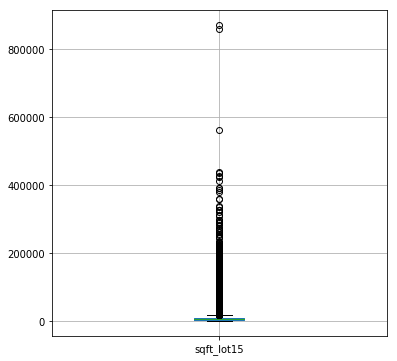

In [16]:
plt.figure(figsize = (6,6))
df.boxplot(['sqft_lot15']) 

The boxplot shows that some of these values are several hundred thousand square feet larger than the others. It also seems that the interquartile range is near zero. We already know that 75% of the lots are 10,000 square feet or less, but the mean is around 12000. This means the outliers are influencing the calculations. Removing the biggest outliers will creat handier data, then we can normalize the data later.

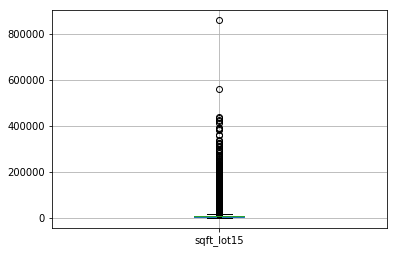

In [17]:
drop_max('sqft_lot15')

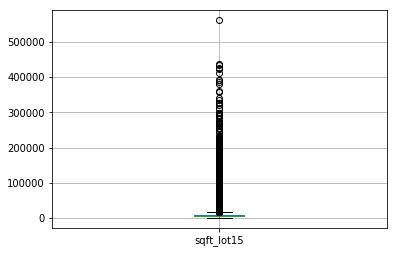

In [18]:
drop_max('sqft_lot15')

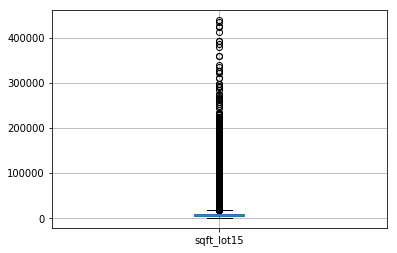

In [19]:
drop_max('sqft_lot15')

In [20]:
df.sqft_lot15.describe()

count     21594.000000
mean      12654.010373
std       25746.123012
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10080.000000
max      438213.000000
Name: sqft_lot15, dtype: float64

Removing the outliers actually pushed the mean higher. Because the mean depends partially on the number of data points, removing the outliers gave more weight to the next highest values. The best step for this column is normalization and scaling, because there are so many outliers. 

Now that the "quick fix" scrubbing is complete, it's time to take a close look at the year_renovated column, which has missing values.

### Handling Null Values

In [21]:
df['yr_renovated'].unique() # take a look at the values to look for anomalies

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

Here we see the yr_renovated column has a number of issues, besides being incomplete. First, there are two different ways to denote null values ('0' and 'nan'-- blank cells). Morever, the values are all floats, but there are no numbers following the years. Whereas I had assumed the date was typed as yr.month.day (e.g. 1990.05.23), this is simply a list of years. To clean this column, we need to do two things: 1) determine whether to remove or replace null values and 2) reformat the values so they are simple integers (or potentially, datetime objects). 

In [22]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [23]:
17011/len(df['yr_renovated'])

0.787655692920313

Almost 80% of the data contains a '0'. Either the data is missing or the houses have never been renovated, At any rate, we won't gain much insight from such a small sample. It's better to drop it than to attempt to clean it and use it. 

In [24]:
df = df.drop(['yr_renovated'], axis = 1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3.0,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650.0
1,6414100192,12/9/2014,538000.0,3.0,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639.0
2,5631500400,2/25/2015,180000.0,2.0,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062.0
3,2487200875,12/9/2014,604000.0,4.0,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000.0
4,1954400510,2/18/2015,510000.0,3.0,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503.0


Next, let's look at the yr_built column.

In [25]:
df.yr_built.unique() #check for obvious place holders

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)

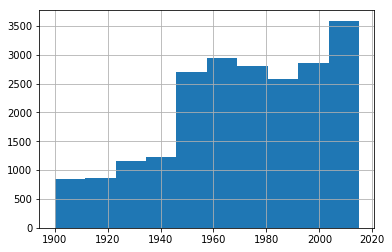

In [26]:
df.yr_built.hist() # check for categories with a seemingly large amount of values

Everything checks out with the yr_built category. The sharp rise in house construction between 1940 and 1945 is consistent with the rising population in the post-WWII era. I verified the population by looking at [the history of King County](https://www.kingcounty.gov/depts/records-licensing/archives/research-guides/KCHistoryQuickFacts.aspx). 

In [27]:
pd.to_datetime(df['date'])  # change the date into something pandas can read

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
5       2014-05-12
6       2014-06-27
7       2015-01-15
8       2015-04-15
9       2015-03-12
10      2015-04-03
11      2014-05-27
12      2014-05-28
13      2014-10-07
14      2015-03-12
15      2015-01-24
16      2014-07-31
17      2014-05-29
18      2014-12-05
19      2015-04-24
20      2014-05-14
21      2014-08-26
22      2014-07-03
23      2014-05-16
24      2014-11-20
25      2014-11-03
26      2014-06-26
27      2014-12-01
28      2014-06-24
29      2015-03-02
           ...    
21567   2014-06-10
21568   2014-12-02
21569   2014-08-28
21570   2014-10-15
21571   2015-03-05
21572   2014-11-13
21573   2014-09-10
21574   2014-05-14
21575   2014-10-02
21576   2015-04-16
21577   2015-03-17
21578   2014-10-17
21579   2014-10-31
21580   2014-08-13
21581   2015-04-21
21582   2014-10-13
21583   2014-09-15
21584   2014-10-15
21585   2015-04-07
21586   2014-06-26
21587   2014-08-25
21588   2015

In [28]:
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [29]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
480.0       103
530.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
550.0        76
780.0        76
650.0        75
240.0        74
380.0        73
680.0        73
850.0        72
          ...  
1770.0        1
1798.0        1
508.0         1
475.0         1
1960.0        1
588.0         1
666.0         1
2350.0        1
3000.0        1
2050.0        1
266.0         1
1525.0        1
2810.0        1
768.0         1
1248.0        1
652.0         1
207.0         1
274.0         1
143.0         1
2310.0        1
2570.0        1
417.0         1
1913.0        1
2720.0        1
784.0         1
602.0         1
4130.0        1
875.0         1
1930.0        1
176.0         1
Name: sqft_basement, Len

In [30]:
df = df[df.sqft_basement != '?'] # because '0' may mean no baesment, drop '?'
df['sqft_basement'].value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
450.0       103
480.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
550.0        76
780.0        76
650.0        75
240.0        74
380.0        73
680.0        73
850.0        72
360.0        72
          ...  
1770.0        1
1798.0        1
508.0         1
475.0         1
1960.0        1
588.0         1
666.0         1
2350.0        1
3000.0        1
2050.0        1
266.0         1
1525.0        1
2810.0        1
768.0         1
1248.0        1
652.0         1
207.0         1
274.0         1
143.0         1
2310.0        1
2570.0        1
417.0         1
1913.0        1
2720.0        1
784.0         1
602.0         1
4130.0        1
875.0         1
1930.0        1
176.0         1
Name: sqft_basement, Len

I have chosen to drop only the '?' place holder because we have no way of knowing whether the zero values are placeholders for missing information or simply an indication that the houses do not have basements, I am hesitant to remove them. 

In [31]:
((df.waterfront.isna().sum())/(len(df['waterfront'])))*100 # find the percentage of missing data

11.062763089438585

In [32]:
df.waterfront.unique()

array([nan,  0.,  1.])

The waterfront column contains boolean information: either the property is near the waterfront or it isn't. While dropping the rows with missing data would leave us with 90% of our data. For the sake of modelling, I'll drop these values. I'll separate the '0's and '1's into two different data frames and see what insight I can gain from it. 

In [33]:
df_waterfront_c= df[df['waterfront'] == df['waterfront']] # creating a new waterfront dataframe w/o null values
print(df_waterfront_c[df_waterfront_c.waterfront ==0].shape, 
      df_waterfront_c[df_waterfront_c.waterfront ==1].shape)

(18662, 20) (142, 20)


In [34]:
df_waterfront_c[df_waterfront_c.waterfront ==0].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.866200e+04,1.866200e+04,18661.000000,18662.000000,18662.000000,1.866200e+04,18662.000000,18662.0,18608.000000,18662.000000,18662.000000,18662.000000,18662.000000,18662.000000,18662.000000,18662.000000,18662.000000,18659.000000
mean,4.592109e+09,5.327914e+05,3.372810,2.112957,2074.159629,1.501725e+04,1.493516,0.0,0.203730,3.409013,7.652556,1786.485425,1971.133908,98077.490515,47.560212,-122.213485,1982.654056,12590.787341
std,2.875997e+09,3.453042e+05,0.900142,0.764426,909.276295,4.098377e+04,0.539586,0.0,0.698818,0.649370,1.166792,825.465244,29.329534,53.399790,0.138937,0.140579,681.277649,25706.981451
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.0,0.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.124079e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.0,0.000000,3.000000,7.000000,1190.000000,1952.000000,98032.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.603500e+03,1.500000,0.0,0.000000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.572400,-122.229000,1840.000000,7616.000000
75%,7.330901e+09,6.385000e+05,4.000000,2.500000,2540.000000,1.058950e+04,2.000000,0.0,0.000000,4.000000,8.000000,2210.000000,1997.000000,98117.000000,47.678300,-122.125000,2350.000000,10035.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,0.0,4.000000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,434728.000000


In [35]:
df_waterfront_c[df_waterfront_c.waterfront ==1].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.420000e+02,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.0,141.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,4.478870e+09,1.731020e+06,3.373239,2.720070,3265.415493,25716.830986,1.626761,1.0,3.780142,3.542254,8.852113,2516.436620,1962.521127,98096.197183,47.540779,-122.276063,2697.485915,22733.514085
std,2.862214e+09,1.158149e+06,1.101959,1.132797,1668.837423,45039.417864,0.550424,0.0,0.561785,0.740167,1.798136,1296.927545,26.916398,60.669228,0.112793,0.124645,812.719502,23172.405390
min,1.210290e+08,2.850000e+05,1.000000,0.750000,440.000000,1989.000000,1.000000,1.0,1.000000,1.000000,5.000000,440.000000,1905.000000,98004.000000,47.327600,-122.514000,750.000000,3230.000000
25%,2.016369e+09,8.212500e+05,3.000000,1.812500,2082.500000,11533.000000,1.000000,1.0,4.000000,3.000000,8.000000,1560.000000,1942.000000,98040.000000,47.453975,-122.376000,2140.000000,11991.500000
50%,3.692780e+09,1.590000e+06,3.000000,2.500000,2935.000000,17730.500000,2.000000,1.0,4.000000,3.000000,9.000000,2240.000000,1960.000000,98074.500000,47.548750,-122.270000,2710.000000,16260.500000
75%,7.494475e+09,2.300000e+06,4.000000,3.250000,4127.500000,26692.500000,2.000000,1.0,4.000000,4.000000,10.000000,3220.000000,1984.750000,98155.000000,47.607550,-122.209250,3200.000000,24537.500000
max,9.808701e+09,7.060000e+06,6.000000,6.750000,10040.000000,505166.000000,3.000000,1.0,4.000000,5.000000,12.000000,7680.000000,2014.000000,98199.000000,47.772900,-122.059000,4913.000000,192268.000000


Interestingly, we see that although there are few waterfront properties, they have higher view counts than the non-waterfront properties. Waterfront properties have higher grades, despite their conditions being roughly the same condition as nonwaterfront properties. The non-waterfront properties group has a very wide, skewed range of values, and even the max price of the nonwaterfront properties is higher than the waterfront proeprties. 

In [36]:
df = df.dropna(how = 'any')

In [37]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3.0,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639.0
2,5631500400,2/25/2015,180000.0,2.0,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062.0
3,2487200875,12/9/2014,604000.0,4.0,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000.0
4,1954400510,2/18/2015,510000.0,3.0,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503.0
5,7237550310,5/12/2014,1230000.0,4.0,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,98053,47.6561,-122.005,4760,101930.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18745 entries, 1 to 21596
Data columns (total 20 columns):
id               18745 non-null int64
date             18745 non-null object
price            18745 non-null float64
bedrooms         18745 non-null float64
bathrooms        18745 non-null float64
sqft_living      18745 non-null int64
sqft_lot         18745 non-null int64
floors           18745 non-null float64
waterfront       18745 non-null float64
view             18745 non-null float64
condition        18745 non-null int64
grade            18745 non-null int64
sqft_above       18745 non-null int64
sqft_basement    18745 non-null object
yr_built         18745 non-null int64
zipcode          18745 non-null int64
lat              18745 non-null float64
long             18745 non-null float64
sqft_living15    18745 non-null int64
sqft_lot15       18745 non-null float64
dtypes: float64(9), int64(9), object(2)
memory usage: 3.0+ MB


I have dropped the NaN rows from the waterfont category, which still leaves us with almost 19,000 data points.

## Exploring the Data

#### How are housing prices distributed?

In [39]:
df['price'].describe()

count    1.874500e+04
mean     5.415262e+05
std      3.715921e+05
min      7.800000e+04
25%      3.215000e+05
50%      4.500000e+05
75%      6.430020e+05
max      7.700000e+06
Name: price, dtype: float64

In [40]:
df['price'].median(), df['price'].mode()

(450000.0, 0    450000.0
 dtype: float64)

The mean price is around 540,000 USD whereas the median and mode are 450,000 USD. Because the mean is much higher than the median and mode, we can say the price has positive skewness. There are houses being sold for higher-than-average value. Looking at the distribution will help us better understand the physical shape of the price data.

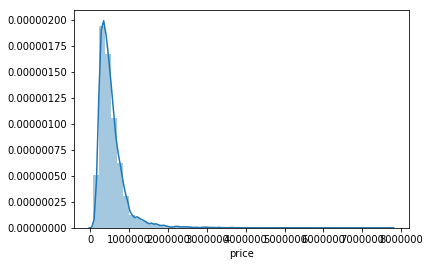

In [41]:
sns.distplot(df['price'])

Leptokurtic distributions are characterized by tall, skinny vertical columns and long tails. At a glance, the prices appear to be leptokurtic, which indicates an excess of extreme values. 

In [42]:
skew(df['price']), kurtosis(df['price'])

(4.094988777579948, 35.537361157472624)

Skewness is a measure of asymmetry. Ideally, skewness would be near zero and indicate a normal distribution ("bell curve"). Our skewness it 4.1, which is rather high. Kurtosis measures the "peak-ness" of our distribution. Ideal kurtosis is around 3. Our kurtosis is 35.6. The graph is skewed so far as to have an extreme peak. This can be fixed with scaling and normalization, but before I do any normalizing, I would like to check correlations between features in the current data set. 

#### How are the features related to one another?

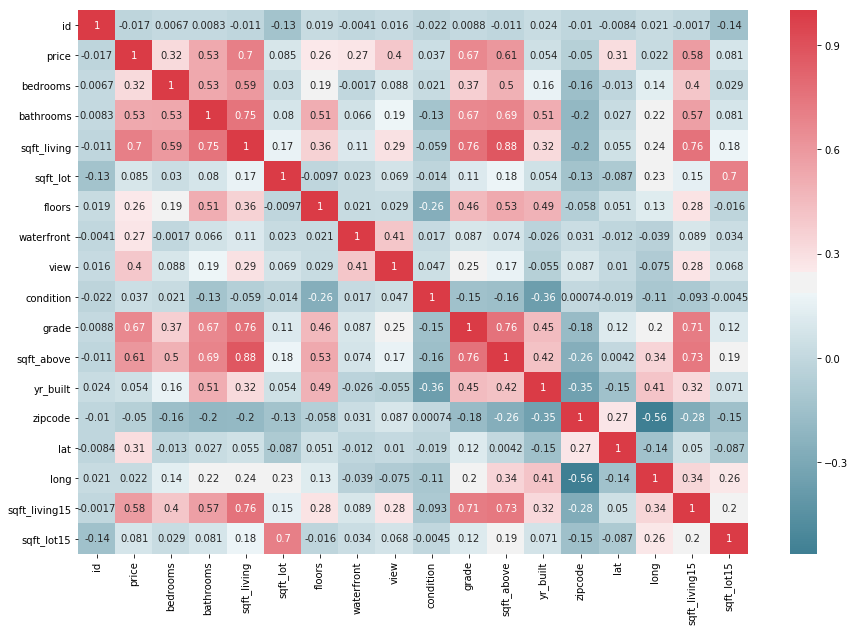

In [43]:
correlation_heatmap(df)

In [44]:
# encode the categorical variables
lb_make = LabelEncoder() # call sklearns's encoder function
condition_encoded = lb_make.fit_transform(df['condition'])
waterfront_encoded = lb_make.fit_transform(df['waterfront'])

Perfect correlation would be "1" and would show that the values are perfectly matched. There is a high correlation (0.7) between price and the square footage of the house.  The next highest correlations are with grade (0.67), square footage of the above ground space (0.61) and square footage of the house in 2015-- after renovations (0.58). It bears repeating that correlation is not the same as causation. We cannot say for certain that manipulating one of these features will affect the price, but we can explore the relationship.

### Normalizing the Values

(0.5252679166652003, 1.3264863153993902)

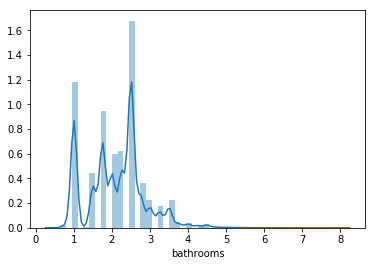

In [45]:
sns.distplot(df['bathrooms'])
skew(df['bathrooms']), kurtosis(df['bathrooms'])

(1.505821350028867, 5.596892345786996)

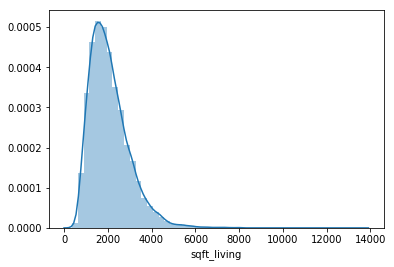

In [46]:
sns.distplot(df['sqft_living'])
skew(df['sqft_living']), kurtosis(df['sqft_living'])

(1.4588244687038947, 3.516546444541606)

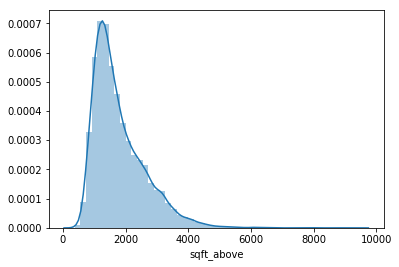

In [47]:
sns.distplot(df['sqft_above'])
skew(df['sqft_above']), kurtosis(df['sqft_above'])

(0.7972998705293189, 1.1709365820013078)

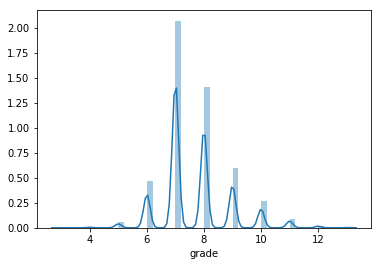

In [48]:
sns.distplot(df['grade'])
skew(df['grade']), kurtosis(df['grade'])

These distribution plots show us that while the grade and number of bathrooms have fairly symmetrical distributions, the square footage distributions are highly skewed. All of the graphs have unnacceptable kurtosis numbers except the square footage of the above ground living space. Normalizing these features will create more even distributions for comparison. 

In [49]:
# normalizing and scaling the values and saving them to a new DataFrame
df_normal = pd.DataFrame([])
df_normal['bathrooms_norm'] = np.log(df['bathrooms'])
df_normal['sqft_living_norm'] = np.log(df['sqft_living'])
df_normal['sqft_above_norm'] = np.log(df['sqft_above'])
df_normal['grade_norm'] = np.log(df['grade'])

In [50]:
df_normal['price']= df['price']

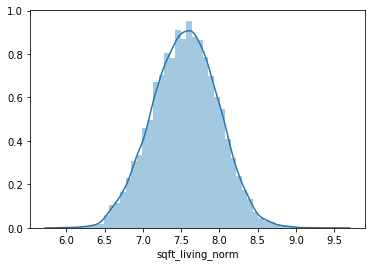

In [51]:
# looking at the new, normalized distribution.
sns.distplot(df_normal['sqft_living_norm'])

In order to normalize the features, I did a log transform.

In [52]:
df_normal.head()

,bathrooms_norm,sqft_living_norm,sqft_above_norm,grade_norm,price
1,0.810930,7.851661,7.682482,1.945910,538000.0
2,0.000000,6.646391,6.646391,1.791759,180000.0
3,1.098612,7.580700,6.956545,1.945910,604000.0
4,0.693147,7.426549,7.426549,2.079442,510000.0
5,1.504077,8.597851,8.266164,2.397895,1230000.0


The .head() shows us out new dataframe. The .describe() shows what the numbers look like.

In [53]:
df_normal.describe()

,bathrooms_norm,sqft_living_norm,sqft_above_norm,grade_norm,price
count,18745.000000,18745.000000,18745.000000,18745.000000,1.874500e+04
mean,0.678411,7.551394,7.396383,2.024781,5.415262e+05
std,0.392048,0.424722,0.428257,0.149636,3.715921e+05
min,-0.693147,5.913503,5.913503,1.098612,7.800000e+04
25%,0.559616,7.265430,7.090077,1.945910,3.215000e+05
50%,0.810930,7.560080,7.352441,1.945910,4.500000e+05
75%,0.916291,7.843849,7.705262,2.079442,6.430020e+05
max,2.079442,9.513404,9.149528,2.564949,7.700000e+06


In [54]:
df_non_norm = pd.DataFrame() #creating a subset of features that have not been normalized for comparison
df_non_norm['price'] = df['price']
df_non_norm['bathrooms'] = df['bathrooms']
df_non_norm['sqft_living'] = df['sqft_living']
df_non_norm['sqft_above'] = df['sqft_above']
df_non_norm['grade'] = df['grade']

In [55]:
df_non_norm.head()

,price,bathrooms,sqft_living,sqft_above,grade
1,538000.0,2.25,2570,2170,7
2,180000.0,1.00,770,770,6
3,604000.0,3.00,1960,1050,7
4,510000.0,2.00,1680,1680,8
5,1230000.0,4.50,5420,3890,11


### Modeling the Data

In [56]:
def quick_ols(DataFrame = None, target = None):  #formula to run ordinary least squares
    col_names = DataFrame.describe().columns.drop([target])
    results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
    for idx, val in enumerate(col_names):
        print ("Housing: {}~".format(target) + val)
        print ("------------------------------")

        f = '{}~'.format(target) + val
        model = smf.ols(formula=f, data=DataFrame).fit()
        X_new = pd.DataFrame({val: [DataFrame[val].min(), DataFrame[val].max()]});
        preds = model.predict(X_new)
        results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
        print(results[idx+1])

In [57]:
quick_ols(df_normal, 'price')

Housing: price~bathrooms_norm
------------------------------
['bathrooms_norm', 0.20722524047030966, 248813.6407943224, 431468.018337182, 0.0]
Housing: price~sqft_living_norm
------------------------------
['sqft_living_norm', 0.374142478553257, -3499647.7736104243, 535156.0159268535, 0.0]
Housing: price~sqft_above_norm
------------------------------
['sqft_above_norm', 0.29598980508841355, -2950033.332197222, 472063.080350393, 0.0]
Housing: price~grade_norm
------------------------------
['grade_norm', 0.4022860663841753, -2647640.2407073276, 1575067.4270617564, 0.0]


In [58]:
quick_ols(df_non_norm, 'price')

Housing: price~bathrooms
------------------------------
['bathrooms', 0.2766541447739005, 3310.9275454249437, 254215.13297832396, 0.0]
Housing: price~sqft_living
------------------------------
['sqft_living', 0.4968638612752003, -50297.71062445735, 284.2199628213784, 0.0]
Housing: price~sqft_above
------------------------------
['sqft_above', 0.3713931004203129, 53642.35287478261, 272.3065484635407, 0.0]
Housing: price~grade
------------------------------
['grade', 0.445631823858472, -1073790.6697871913, 210855.87679167208, 0.0]


The above list of values are the result of Ordinary Least Squares regression. I used it as a way to quickly compare my features of interest. The object was to find the highest r-squared value and the lowest p-value. The results of these tests show that regardless of whether the data is normalized or not, the grade and the square footage of the living space have the highest impact on price. The non-normalized data, however, produced higher r-squared values. I would like to check what happens when I normalize the price.

In [59]:
df_non_norm['price_norm'] = np.log(df['price'])
df_normal['price_norm'] = np.log(df['price'])

In [60]:
quick_ols(df_normal, 'price_norm')

Housing: price_norm~bathrooms_norm
------------------------------
['bathrooms_norm', 0.2700194085619674, 12.575243384906184, 0.6989316578737963, 0.0]
Housing: price_norm~sqft_living_norm
------------------------------
['sqft_living_norm', 0.4550268864602419, 6.725032744727315, 0.8375107095078237, 0.0]
Housing: price_norm~sqft_above_norm
------------------------------
['sqft_above_norm', 0.3458193831765001, 7.693713115500279, 0.7240961908975478, 0.0]
Housing: price_norm~grade_norm
------------------------------
['grade_norm', 0.4817282853050745, 8.096949303918947, 2.4459223524718396, 0.0]
Housing: price_norm~price
------------------------------
['price', 0.792986059400845, 12.365081509003344, 1.2636962992001273e-06, 0.0]


In [61]:
quick_ols(df_non_norm, 'price_norm')

Housing: price_norm~price
------------------------------
['price', 0.792986059400845, 12.365081509003344, 1.2636962992001273e-06, 0.0]
Housing: price_norm~bathrooms
------------------------------
['bathrooms', 0.3038569210370212, 12.248960362953849, 0.37807443604097124, 0.0]
Housing: price_norm~sqft_living
------------------------------
['sqft_living', 0.48556001554886874, 12.219163210615015, 0.0003987193098934673, 0.0]
Housing: price_norm~sqft_above
------------------------------
['sqft_above', 0.36636236909399933, 12.36176021151823, 0.0003838013840154115, 0.0]
Housing: price_norm~grade
------------------------------
['grade', 0.4962161554461174, 10.630522300945076, 0.3157497375344572, 0.0]


Once again, the non-normalized data just slightly edged out the normalized data set in terms of r-squared values. Here is my data frame containing the most interesting features.

In [62]:
df_final = df_non_norm.drop(['bathrooms', 'sqft_above', 'price'], axis = 1)
df_final.describe()

,sqft_living,grade,price_norm
count,18745.000000,18745.000000,18745.000000
mean,2082.274260,7.660763,13.049406
std,921.574775,1.176437,0.527323
min,370.000000,3.000000,11.264464
25%,1430.000000,7.000000,12.680753
50%,1920.000000,7.000000,13.017003
75%,2550.000000,8.000000,13.373903
max,13540.000000,13.000000,15.856731


In [63]:
y = df_final[['price_norm']]
X = df_final.drop(['price_norm'], axis=1)
X.head()

,sqft_living,grade
1,2570,7
2,770,6
3,1960,7
4,1680,8
5,5420,11


The following linear regression will help me determine the line of best fit.

In [64]:
linreg = LinearRegression()  # calling on an sklearn function
r_list = []  # explain r:
adj_r_list = [] # explain adjusted r: 
list_n = list(range(5,51,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)


price_norm    0.556689
dtype: float64
price_norm    0.556642
dtype: float64
price_norm    0.556689
dtype: float64
price_norm    0.556642
dtype: float64
price_norm    0.556689
dtype: float64
price_norm    0.556642
dtype: float64
price_norm    0.556689
dtype: float64
price_norm    0.556642
dtype: float64
price_norm    0.556689
dtype: float64
price_norm    0.556642
dtype: float64


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

MSE_test = []
MSE_train = []
list_n = list(range(5,51,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
MSE_test.append(mse_test)
MSE_train.append(mse_train)

price_norm    0.121854
dtype: float64
price_norm    0.128983
dtype: float64
price_norm    0.121854
dtype: float64
price_norm    0.128983
dtype: float64
price_norm    0.121854
dtype: float64
price_norm    0.128983
dtype: float64
price_norm    0.121854
dtype: float64
price_norm    0.128983
dtype: float64
price_norm    0.121854
dtype: float64
price_norm    0.128983
dtype: float64


In [66]:
pred_50 = RFE(linreg, n_features_to_select = 85)
pred_50 = select_n.fit(X, np.ravel(y))
selected_columns = X.columns[select_n.support_]

cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error")

cv_10_results

array([-0.12992887, -0.13410476, -0.12690261, -0.1234566 , -0.12093407,
       -0.12765041, -0.12594775, -0.13018151, -0.12877479, -0.08610485])

The r-value is 0.6968500556073738.


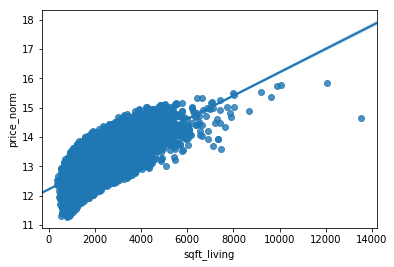

In [67]:
sns.regplot(x=df_final['sqft_living'], y=df_final['price_norm'], ci=95)
import math
sqft_liv_r_val = math.sqrt(0.4856)
print("The r-value is {}.".format(sqft_liv_r_val))

The r-value is 0.7048404074682438.


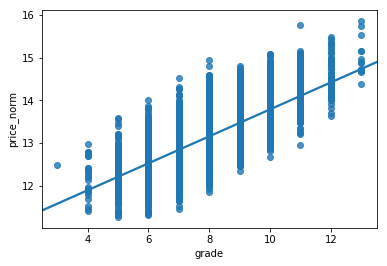

In [68]:
sns.regplot(x=df_final['grade'], y=df_final['price_norm'], ci=95)
grade_r_val = math.sqrt(0.4968)
print("The r-value is {}.".format(grade_r_val))

The above is simple linear regression. Now That I have chosen my features, I would like to see the model with multiple linear regression.

In [72]:
#MR Model 1:
X = df_final[['grade', 'sqft_living']]  #non-normalized features
y = df_final['price_norm']  #normalized price
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price_norm   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 7.282e+05
Date:                Thu, 10 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:55:01   Log-Likelihood:                -33847.
No. Observations:               18745   AIC:                         6.770e+04
Df Residuals:                   18743   BIC:                         6.771e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
grade           1.9720      0.004    440.445      0.000       1.963       1.981
sqft_living    -0.0011   1.52e-05    -70.604      0.000      -0.001      -0.001
==============================================================================
Omnibus:                      405.643   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              521.781
Skew:                          -0.281   Prob(JB):                    4.97e-114
Kurtosis:                       3.593   Cond. No.                         948.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above model is the combination of non-normalized features and the normalized price. As expected, the p-value is low (actually, it's 0) and the r-value is high (0.987). Based on these numbers, I have high confidence that 98.7% of the data is explained by that MR Model 1. The standard errors for both features are very low (0.004 for grade and ~0 for sqft_living). 

In [73]:
#MR Model 2
X = df_final[['grade', 'sqft_living']] #non-normalized features 
y = df['price'] #non-normalized price
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 4.848e+04
Date:                Thu, 10 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:55:17   Log-Likelihood:            -2.6063e+05
No. Observations:               18745   AIC:                         5.213e+05
Df Residuals:                   18743   BIC:                         5.213e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
grade        1740.4237    803.898      2.165      0.030     164.710    3316.137
sqft_living   258.3888      2.736     94.432      0.000     253.025     263.752
==============================================================================
Omnibus:                    14349.510   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           665236.371
Skew:                           3.258   Prob(JB):                         0.00
Kurtosis:                      31.448   Cond. No.                         948.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MR Model 2 is my "control group." In essence, I used the data from the cleaned but non-standardized dataframe to test the validity of the model. While the p-value remains low (0.03), there is a marked drop in the r-value (0.838) as compared to MR Model 1 (0.987). Moreover, the standard error for this model is high for the 'grade' feature (803.898). In non-standardized, real-world data, one expects a relatively high amount of error, so an error of roughly 804 dollars may be reasonable. However, let's keep looking for more precise models.

In [76]:
#MR Model 3
X = df_normal[['grade_norm', 'sqft_living_norm']] #normalized features
y = df_final['price_norm'] #normalized price
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price_norm   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 5.939e+06
Date:                Thu, 10 Jan 2019   Prob (F-statistic):               0.00
Time:                        22:11:21   Log-Likelihood:                -14281.
No. Observations:               18745   AIC:                         2.857e+04
Df Residuals:                   18743   BIC:                         2.858e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
grade_norm           1.6006      0.038     42.125      0.000       1.526       1.675
sqft_living_norm     1.2961      0.010    127.075      0.000       1.276       1.316
==============================================================================
Omnibus:                      484.400   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              527.732
Skew:                           0.388   Prob(JB):                    2.54e-115
Kurtosis:                       3.268   Cond. No.                         81.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MR Model 3 shows the most promising results. Both the features and the target are standardized, and the result is a model that explains almost 100% of the data (the r-squared value is 0.998). The p-value is zero and the standard errors for grade and sqft_living are 0.038 and 0.010, respectively. Because the models is based on standardized data, though, I would need to perform more calculations so the data reflects real-world values.

In [77]:
#MR Model 4
X = df_normal[['grade_norm', 'sqft_living_norm']] #normalized features
y = df['price']  #non-normalized price
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                 2.546e+04
Date:                Thu, 10 Jan 2019   Prob (F-statistic):               0.00
Time:                        22:11:40   Log-Likelihood:            -2.6538e+05
No. Observations:               18745   AIC:                         5.308e+05
Df Residuals:                   18743   BIC:                         5.308e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
grade_norm        9.518e+05    2.5e+04     38.119      0.000    9.03e+05       1e+06
sqft_living_norm  -1.82e+05   6702.738    -27.156      0.000   -1.95e+05   -1.69e+05
==============================================================================
Omnibus:                    17794.489   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1484107.496
Skew:                           4.389   Prob(JB):                         0.00
Kurtosis:                      45.698   Cond. No.                         81.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MR Model 4 is the antithesis of MR Model 1. I normalized the features and kept the non-normalized price. MR Model 4 is very imprecise. Only about 73% of the data fits the regression line. The standard error for sqft_living is in the thousands (~6703) and for grade it's in the tens of thousands (25000). This model is too inaccurate to use. 

Ultimately, the best models are MR Model 1 (non-normalized features and normalized price) and MR Model 3 (both normalized price and features).